In [1]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [2]:
import polars

def win_function(score: int) -> int:
    if score > 0:
        return 1
    else:
        return -1

data_frame = polars.read_csv("data/zach-pete.csv", has_header=True, new_columns=["Date", "Zach", "Pete", "Gammon"], try_parse_dates=True)
data_frame = data_frame.with_columns(Zach=polars.col("Zach").fill_null(0), Pete=polars.col("Pete").fill_null(0), Gammon=polars.col("Gammon").fill_null(False).is_in(("gammon", "Gammon")))
data_frame = data_frame.with_columns(Diff=polars.col("Zach") - polars.col("Pete"), ZachWins=polars.col("Zach").map_elements(win_function, return_dtype=int), GameValue=polars.col("Zach") + polars.col("Pete"))
data_frame = data_frame.with_columns(ZachLead=polars.col("Diff").cum_sum(), ZachWinCount=polars.col("ZachWins").cum_sum(), MeanGameValue=polars.col("GameValue").rolling_mean(window_size=10)).with_row_index()
data_frame

index,Date,Zach,Pete,Gammon,Zach Total,Pete Total,Delta,_duplicated_0,Zach Wins,Pete Wins,_duplicated_1,Score,Zach Scores,Score_duplicated_0,Pete Scores,_duplicated_2,_duplicated_3,_duplicated_4,Date_duplicated_0,Games Played,Pete Score,Zach Score,Diff,ZachWins,GameValue,ZachLead,ZachWinCount,MeanGameValue
u32,date,i64,i64,bool,str,i64,i64,str,i64,i64,str,i64,i64,i64,i64,str,str,str,date,i64,i64,i64,i64,i64,i64,i64,i64,f64
0,2024-09-19,0,4,false,"""397""",397,0,null,193,201,null,null,0,null,0,null,null,null,null,0,null,null,-4,-1,4,-4,-1,null
1,2024-09-19,2,0,false,null,null,null,null,null,null,null,1,89,1,97,null,null,null,2024-09-19,6,4,7,2,1,2,-2,0,null
2,2024-09-19,2,0,false,null,null,null,null,null,null,null,2,66,2,66,null,null,null,2024-09-20,8,4,12,2,1,2,0,1,null
3,2024-09-19,1,0,false,null,null,null,null,null,null,null,4,32,4,36,null,null,null,2024-09-29,4,2,4,1,1,1,1,2,null
4,2024-09-19,1,0,false,null,null,null,null,null,null,null,8,6,8,1,null,null,null,2024-09-30,3,1,5,1,1,1,2,3,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
392,2025-06-24,0,1,false,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,-1,-1,1,-2,-11,2.8
393,2025-06-24,2,0,true,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2,1,2,0,-10,2.9
394,2025-06-24,0,1,false,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,-1,-1,1,-1,-11,2.8


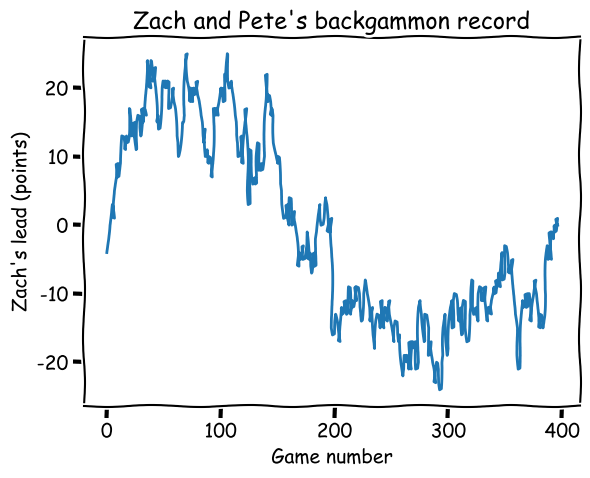

In [3]:
from matplotlib import pyplot

with pyplot.xkcd():
    pyplot.plot(data_frame["index"], data_frame["ZachLead"])
    pyplot.title("Zach and Pete's backgammon record")
    pyplot.ylabel("Zach's lead (points)")
    pyplot.xlabel("Game number")
    pyplot.show()

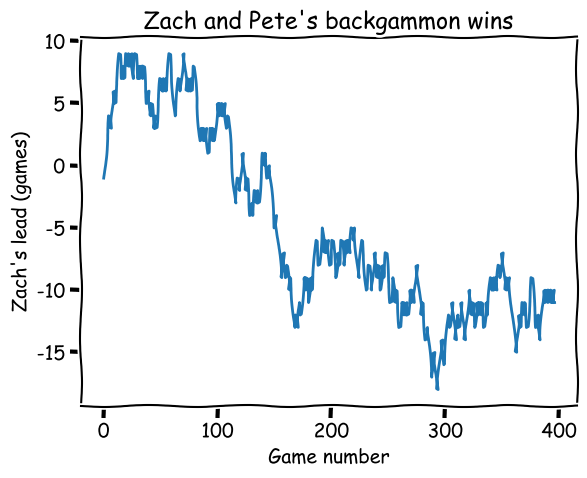

In [4]:
from matplotlib import pyplot

with pyplot.xkcd():
    pyplot.plot(data_frame["index"], data_frame["ZachWinCount"])
    pyplot.title("Zach and Pete's backgammon wins")
    pyplot.ylabel("Zach's lead (games)")
    pyplot.xlabel("Game number")
    pyplot.show()

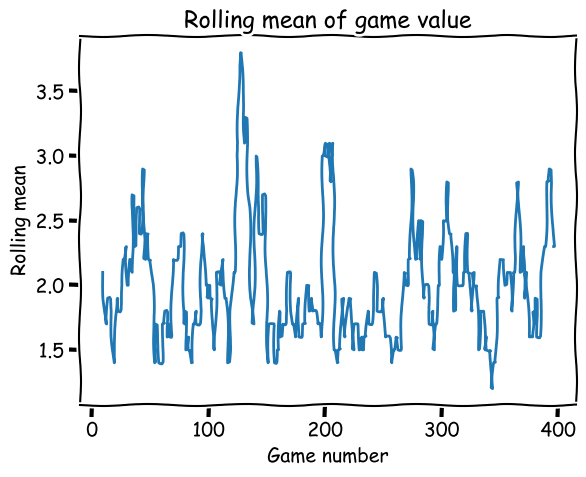

In [5]:
from matplotlib import pyplot

with pyplot.xkcd():
    pyplot.plot(data_frame["index"], data_frame["MeanGameValue"])
    pyplot.title("Rolling mean of game value")
    pyplot.xlabel("Game number")
    pyplot.ylabel("Rolling mean")
    pyplot.show()

In [6]:
date_data_frame = data_frame.group_by(polars.col("Date"), maintain_order=True).agg(polars.col("Diff").sum())
date_data_frame = date_data_frame.with_columns(ZachLead=polars.col("Diff").cum_sum())
date_data_frame

Date,Diff,ZachLead
date,i64,i64
2024-09-19,3,3
2024-09-20,8,11
2024-09-29,2,13
2024-09-30,4,17
2024-10-03,-2,15
…,…,…
2025-06-02,4,-8
2025-06-18,-11,-19
2025-06-20,14,-5


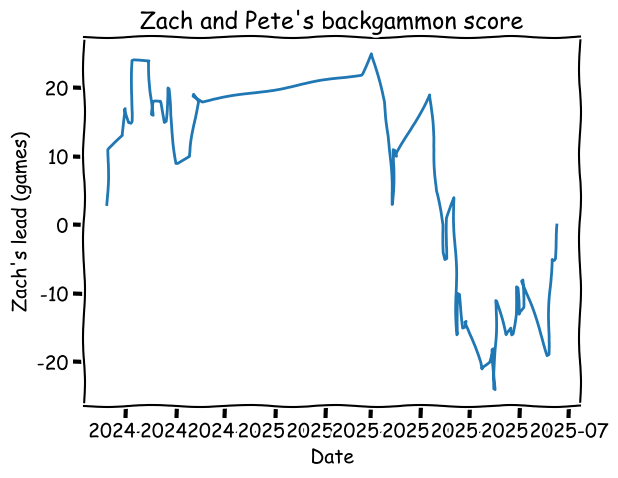

In [7]:
from matplotlib import pyplot

with pyplot.xkcd():
    pyplot.plot(date_data_frame["Date"], date_data_frame["ZachLead"])
    pyplot.title("Zach and Pete's backgammon score")
    pyplot.ylabel("Zach's lead (games)")
    pyplot.xlabel("Date")
    pyplot.show()